In [9]:
from scipy.io import loadmat
import numpy as np
from dipy.core.gradients import gradient_table
import time
import matplotlib.pyplot as plt
import numpy as np
from dipy.data import get_fnames
from dipy.io.gradients import read_bvals_bvecs
from dipy.segment.mask import median_otsu
from dipy.io.image import load_nifti_data, load_nifti
import sys
sys.path.append("..")

In [10]:
from model.topopro import IvimModelTopoPro
from scipy.optimize import shgo

In [11]:
fraw, fbval, fbvec = get_fnames('ivim')

In [12]:
data = load_nifti_data(fraw)
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)
gtab = gradient_table(bvals, bvecs, b0_threshold=0)
print('data.shape (%d, %d, %d, %d)' % data.shape)

data.shape (256, 256, 54, 21)


In [13]:
_, mask = median_otsu(data, vol_idx=[0, 1])

In [14]:
t1 = time.time()
topopro = IvimModelTopoPro(gtab, bounds=([0., 0., 0.], [0.9, 0.9, 0.9]))
topopro_fit = topopro.fit(data[..., 33, :], mask[..., 33])
t2 = time.time()
print("Time Taken: ", t2 -t1) 

Time Taken:  222.25024032592773


In [15]:
# helper function to see plots with matplotlib:
def plot_map(raw_data, variable, limits, filename):
    fig, ax = plt.subplots(1)
    lower, upper = limits
    ax.set_title('Map for {}'.format(variable))
    im = ax.imshow(raw_data.T, origin='lower', clim=(lower, upper),
                   cmap="inferno", interpolation='nearest')
    fig.colorbar(im)
    fig.savefig(filename)

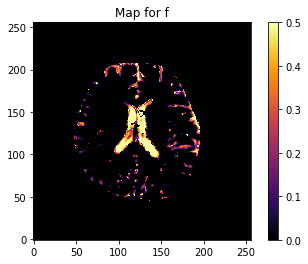

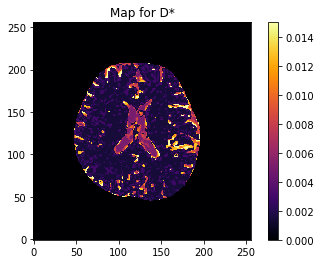

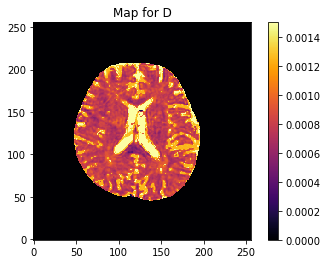

In [16]:
plot_map(topopro_fit.perfusion_fraction, "f", (0, .5), "perfusion_fraction.png")
plot_map(topopro_fit.D_star, "D*", (0., 0.015), "perfusion_coeff.png")
plot_map(topopro_fit.D, "D", (0, 0.0015), "diffusion_coeff.png")

In [ ]:
data